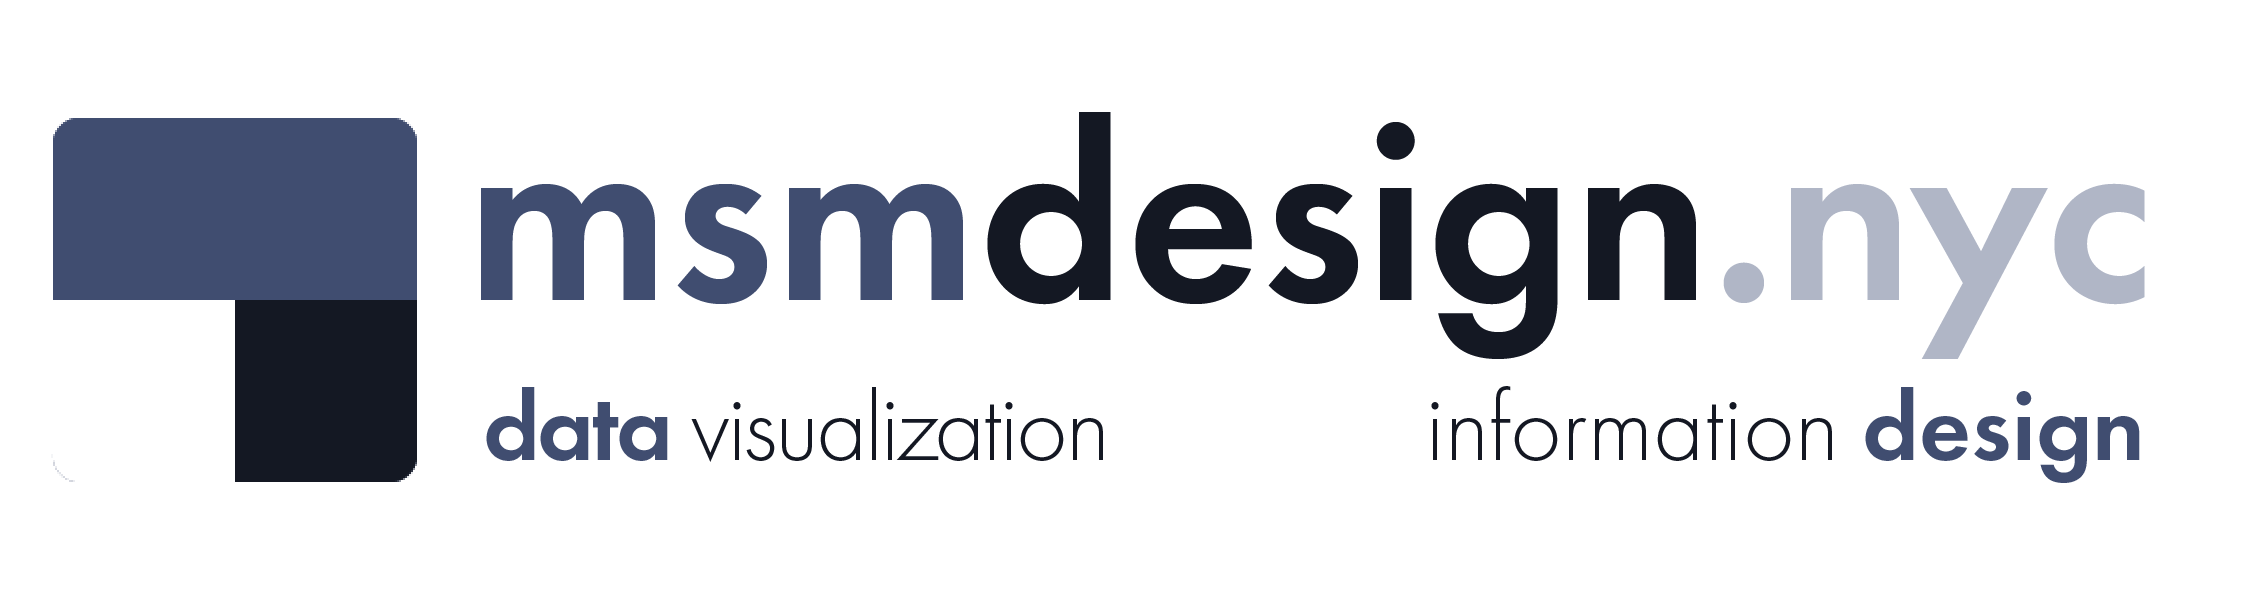

# MSM-E14 Boxplot - 2019 NYS CCLS Mean Scale Score

# Data Visualization by David White

In [1]:
# import libraries needed for data analysis and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# load the data and save it to a dataframe

data = pd.read_csv("https://raw.githubusercontent.com/davidwhitemsm/selected-open-datasources/master/MSM-DS19b-3-8_ELA_AND_MATH_NYC_SUMMARY_2019.csv", encoding="utf-8", na_values=['-'])

In [34]:
# confirm that the data has loaded correctly

data.head(100)

SCHOOL YEAR END DATE     BEDS CODE                                   NAME  \
0            06/30/2019  310100010000  NEW YORK CITY GEOGRAPHIC DISTRICT # 1   
1            06/30/2019  310100010000  NEW YORK CITY GEOGRAPHIC DISTRICT # 1   
2            06/30/2019  310100010000  NEW YORK CITY GEOGRAPHIC DISTRICT # 1   
3            06/30/2019  310100010000  NEW YORK CITY GEOGRAPHIC DISTRICT # 1   
4            06/30/2019  310100010000  NEW YORK CITY GEOGRAPHIC DISTRICT # 1   
..                  ...           ...                                    ...   
95           06/30/2019  310100010184                      PS 184 SHUANG WEN   
96           06/30/2019  310100010188             PS 188 ISLAND SCHOOL (THE)   
97           06/30/2019  310100010188             PS 188 ISLAND SCHOOL (THE)   
98           06/30/2019  310100010188             PS 188 ISLAND SCHOOL (THE)   
99           06/30/2019  310100010188             PS 188 ISLAND SCHOOL (THE)   

         SUBJECT STUDENT SUBGROUP  TOTAL TESTED  LEVEL 1 COUNT LEVEL 1 PCT  \
0    Grade 3 ELA     All Students         675.0           54.0          8%   
1   Grade 3 Math     All Students         686.0          129.0         19%   
2    Grade 4 ELA     All Students         678.0          104.0         15%   
3   Grade 4 Math     All Students         678.0          170.0         25%   
4    Grade 5 ELA     All Students         694.0          208.0         30%   
..           ...              ...           ...            ...         ...   
95  Grade 8 Math     All Students          72.0            7.0         10%   
96   Grade 3 ELA     All Students          43.0            4.0          9%   
97  Grade 3 Math     All Students          47.0           10.0         21%   
98   Grade 4 ELA     All Students          33.0            6.0         18%   
99  Grade 4 Math     All Students          33.0            9.0         27%   

    LEVEL 2 COUNT LEVEL 2 PCT  LEVEL 3 COUNT LEVEL 3 PCT  LEVEL 4 COUNT  \
0           207.0         31%          288.0         43%          126.0   
1           139.0         20%          176.0         26%          242.0   
2           171.0         25%          217.0         32%          186.0   
3           149.0         22%          122.0         18%          237.0   
4           184.0         27%          142.0         20%          160.0   
..            ...         ...            ...         ...            ...   
95            7.0         10%           10.0         14%           48.0   
96           31.0         72%            8.0         19%            0.0   
97           18.0         38%           15.0         32%            4.0   
98           14.0         42%           11.0         33%            2.0   
99           15.0         45%            9.0         27%            0.0   

   LEVEL 4 PCT LEVEL 2-4 PCT LEVEL 3-4 PCT  MEAN SCALE SCORE  
0          19%           92%           61%             607.0  
1          35%           81%           61%             606.0  
2          27%           85%           59%             605.0  
3          35%           75%           53%             604.0  
4          23%           70%           44%             604.0  
..         ...           ...           ...               ...  
95         67%           90%           81%             623.0  
96          0%           91%           19%             592.0  
97          9%           79%           40%             596.0  
98          6%           82%           39%             596.0  
99          0%           73%           27%             593.0  

[100 rows x 17 columns]

In [14]:
#check the data type for each column

data.info()

# some columns will need to be converted to numeric values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7777 entries, 0 to 7776
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SCHOOL YEAR END DATE  7777 non-null   object 
 1   BEDS CODE             7777 non-null   int64  
 2   NAME                  7777 non-null   object 
 3   SUBJECT               7777 non-null   object 
 4   STUDENT SUBGROUP      7777 non-null   object 
 5   TOTAL TESTED          7753 non-null   float64
 6   LEVEL 1 COUNT         7753 non-null   float64
 7   LEVEL 1 PCT           7753 non-null   object 
 8   LEVEL 2 COUNT         7753 non-null   float64
 9   LEVEL 2 PCT           7753 non-null   object 
 10  LEVEL 3 COUNT         7753 non-null   float64
 11  LEVEL 3 PCT           7753 non-null   object 
 12  LEVEL 4 COUNT         7753 non-null   float64
 13  LEVEL 4 PCT           7753 non-null   object 
 14  LEVEL 2-4 PCT         7753 non-null   object 
 15  LEVEL 3-4 PCT        

In [7]:
data.columns

Index(['SCHOOL YEAR END DATE', 'BEDS CODE', 'NAME', 'SUBJECT',
       'STUDENT SUBGROUP', 'TOTAL TESTED', 'LEVEL 1 COUNT', 'LEVEL 1 PCT',
       'LEVEL 2 COUNT', 'LEVEL 2 PCT', 'LEVEL 3 COUNT', 'LEVEL 3 PCT',
       'LEVEL 4 COUNT', 'LEVEL 4 PCT', 'LEVEL 2-4 PCT', 'LEVEL 3-4 PCT',
       'MEAN SCALE SCORE'],
      dtype='object')

In [10]:
pd.to_numeric(data[]'MEAN SCALE SCORE'])

ValueError: Unable to parse string "-" at position 107

In [20]:
# list all subjects and grade levels tested in this dataset

data['SUBJECT'].unique()

array(['Grade 3 ELA', 'Grade 3 Math', 'Grade 4 ELA', 'Grade 4 Math',
       'Grade 5 ELA', 'Grade 5 Math', 'Grade 6 ELA', 'Grade 6 Math',
       'Grade 7 ELA', 'Grade 7 Math', 'Grade 8 ELA', 'Grade 8 Math'],
      dtype=object)

In [15]:
# determine why the column is being read as object data type by listing the unique values in that column

data['LEVEL 2 PCT'].unique()

array(['31%', '20%', '25%', '22%', '27%', '18%', '17%', '24%', '21%',
       '30%', '23%', '26%', '15%', '11%', '40%', '33%', '29%', '38%',
       '28%', '35%', '42%', '32%', '34%', '16%', '67%', '39%', '41%',
       '36%', '56%', '47%', '50%', '45%', '7%', '59%', '5%', '53%', '57%',
       '49%', '12%', '6%', '9%', '10%', '72%', '58%', nan, '8%', '37%',
       '19%', '13%', '43%', '14%', '70%', '3%', '0%', '1%', '2%', '4%',
       '60%', '48%', '44%', '52%', '46%', '54%', '62%', '68%', '64%',
       '69%', '51%', '55%', '63%', '61%', '65%', '66%'], dtype=object)

In [37]:
pd.set_option('display.max_rows', 500)
data.head(500)

SCHOOL YEAR END DATE     BEDS CODE  \
0             06/30/2019  310100010000   
1             06/30/2019  310100010000   
2             06/30/2019  310100010000   
3             06/30/2019  310100010000   
4             06/30/2019  310100010000   
5             06/30/2019  310100010000   
6             06/30/2019  310100010000   
7             06/30/2019  310100010000   
8             06/30/2019  310100010000   
9             06/30/2019  310100010000   
10            06/30/2019  310100010000   
11            06/30/2019  310100010000   
12            06/30/2019  310100010015   
13            06/30/2019  310100010015   
14            06/30/2019  310100010015   
15            06/30/2019  310100010015   
16            06/30/2019  310100010015   
17            06/30/2019  310100010015   
18            06/30/2019  310100010019   
19            06/30/2019  310100010019   
20            06/30/2019  310100010019   
21            06/30/2019  310100010019   
22            06/30/2019  310100010019   
23            06/30/2019  310100010019   
24            06/30/2019  310100010020   
25            06/30/2019  310100010020   
26            06/30/2019  310100010020   
27            06/30/2019  310100010020   
28            06/30/2019  310100010020   
29            06/30/2019  310100010020   
30            06/30/2019  310100010034   
31            06/30/2019  310100010034   
32            06/30/2019  310100010034   
33            06/30/2019  310100010034   
34            06/30/2019  310100010034   
35            06/30/2019  310100010034   
36            06/30/2019  310100010034   
37            06/30/2019  310100010034   
38            06/30/2019  310100010034   
39            06/30/2019  310100010034   
40            06/30/2019  310100010034   
41            06/30/2019  310100010034   
42            06/30/2019  310100010063   
43            06/30/2019  310100010063   
44            06/30/2019  310100010063   
45            06/30/2019  310100010063   
46            06/30/2019  310100010063   
47            06/30/2019  310100010063   
48            06/30/2019  310100010064   
49            06/30/2019  310100010064   
50            06/30/2019  310100010064   
51            06/30/2019  310100010064   
52            06/30/2019  310100010064   
53            06/30/2019  310100010064   
54            06/30/2019  310100010110   
55            06/30/2019  310100010110   
56            06/30/2019  310100010110   
57            06/30/2019  310100010110   
58            06/30/2019  310100010110   
59            06/30/2019  310100010110   
60            06/30/2019  310100010134   
61            06/30/2019  310100010134   
62            06/30/2019  310100010134   
63            06/30/2019  310100010134   
64            06/30/2019  310100010134   
65            06/30/2019  310100010134   
66            06/30/2019  310100010140   
67            06/30/2019  310100010140   
68            06/30/2019  310100010140   
69            06/30/2019  310100010140   
70            06/30/2019  310100010140   
71            06/30/2019  310100010140   
72            06/30/2019  310100010140   
73            06/30/2019  310100010140   
74            06/30/2019  310100010140   
75            06/30/2019  310100010140   
76            06/30/2019  310100010140   
77            06/30/2019  310100010140   
78            06/30/2019  310100010142   
79            06/30/2019  310100010142   
80            06/30/2019  310100010142   
81            06/30/2019  310100010142   
82            06/30/2019  310100010142   
83            06/30/2019  310100010142   
84            06/30/2019  310100010184   
85            06/30/2019  310100010184   
86            06/30/2019  310100010184   
87            06/30/2019  310100010184   
88            06/30/2019  310100010184   
89            06/30/2019  310100010184   
90            06/30/2019  310100010184   
91            06/30/2019  310100010184   
92            06/30/2019  310100010184   
93            06/30/2019  310100010184   
94            

In [53]:
# filter out aggregated NYC Districts listed as line items

df = data[data['NAME'].isin(['NEW YORK CITY GEOGRAPHIC DISTRICT # 1','NEW YORK CITY GEOGRAPHIC DISTRICT # 2','NEW YORK CITY GEOGRAPHIC DISTRICT # 3','NEW YORK CITY GEOGRAPHIC DISTRICT # 4','NEW YORK CITY GEOGRAPHIC DISTRICT # 5','NEW YORK CITY GEOGRAPHIC DISTRICT # 6','NEW YORK CITY GEOGRAPHIC DISTRICT # 7','NEW YORK CITY GEOGRAPHIC DISTRICT # 8','NEW YORK CITY GEOGRAPHIC DISTRICT # 9','NEW YORK CITY GEOGRAPHIC DISTRICT # 10','NEW YORK CITY GEOGRAPHIC DISTRICT # 11','NEW YORK CITY GEOGRAPHIC DISTRICT # 12','NEW YORK CITY GEOGRAPHIC DISTRICT # 13','NEW YORK CITY GEOGRAPHIC DISTRICT # 14','NEW YORK CITY GEOGRAPHIC DISTRICT # 15','NEW YORK CITY GEOGRAPHIC DISTRICT # 16','NEW YORK CITY GEOGRAPHIC DISTRICT # 17','NEW YORK CITY GEOGRAPHIC DISTRICT # 18','NEW YORK CITY GEOGRAPHIC DISTRICT # 19','NEW YORK CITY GEOGRAPHIC DISTRICT # 20','NEW YORK CITY GEOGRAPHIC DISTRICT # 21','NEW YORK CITY GEOGRAPHIC DISTRICT # 22','NEW YORK CITY GEOGRAPHIC DISTRICT # 23',]) == False]
df.head(10)

SCHOOL YEAR END DATE     BEDS CODE                    NAME       SUBJECT  \
12           06/30/2019  310100010015  PS 15 ROBERTO CLEMENTE   Grade 3 ELA   
13           06/30/2019  310100010015  PS 15 ROBERTO CLEMENTE  Grade 3 Math   
14           06/30/2019  310100010015  PS 15 ROBERTO CLEMENTE   Grade 4 ELA   
15           06/30/2019  310100010015  PS 15 ROBERTO CLEMENTE  Grade 4 Math   
16           06/30/2019  310100010015  PS 15 ROBERTO CLEMENTE   Grade 5 ELA   
17           06/30/2019  310100010015  PS 15 ROBERTO CLEMENTE  Grade 5 Math   
18           06/30/2019  310100010019        PS 19 ASHER LEVY   Grade 3 ELA   
19           06/30/2019  310100010019        PS 19 ASHER LEVY  Grade 3 Math   
20           06/30/2019  310100010019        PS 19 ASHER LEVY   Grade 4 ELA   
21           06/30/2019  310100010019        PS 19 ASHER LEVY  Grade 4 Math   

   STUDENT SUBGROUP  TOTAL TESTED  LEVEL 1 COUNT LEVEL 1 PCT  LEVEL 2 COUNT  \
12     All Students          27.0            1.0          4%            7.0   
13     All Students          26.0            4.0         15%            4.0   
14     All Students          18.0            0.0          0%            4.0   
15     All Students          18.0            1.0          6%            2.0   
16     All Students          25.0            6.0         24%           10.0   
17     All Students          26.0            5.0         19%            8.0   
18     All Students          24.0            0.0          0%            8.0   
19     All Students          24.0            1.0          4%            7.0   
20     All Students          32.0            4.0         13%           12.0   
21     All Students          32.0           12.0         38%            9.0   

   LEVEL 2 PCT  LEVEL 3 COUNT LEVEL 3 PCT  LEVEL 4 COUNT LEVEL 4 PCT  \
12         26%           18.0         67%            1.0          4%   
13         15%            8.0         31%           10.0         38%   
14         22%           11.0         61%            3.0         17%   
15         11%            7.0         39%            8.0         44%   
16         40%            4.0         16%            5.0         20%   
17         31%            7.0         27%            6.0         23%   
18         33%           15.0         63%            1.0          4%   
19         29%           11.0         46%            5.0         21%   
20         38%           12.0         38%            4.0         13%   
21         28%            5.0         16%            6.0         19%   

   LEVEL 2-4 PCT LEVEL 3-4 PCT  MEAN SCALE SCORE  
12           96%           70%             606.0  
13           85%           69%             606.0  
14          100%           78%             607.0  
15           94%           83%             611.0  
16           76%           36%             604.0  
17           81%           50%             602.0  
18          100%           67%             606.0  
19           96%           67%             605.0  
20           88%           50%             599.0  
21           63%           34%             594.0

In [58]:
# check resulting dataframe to make sure aggregated districts have been excluded 

pd.set_option('display.max_rows', 8000)
df


SCHOOL YEAR END DATE     BEDS CODE  \
12             06/30/2019  310100010015   
13             06/30/2019  310100010015   
14             06/30/2019  310100010015   
15             06/30/2019  310100010015   
16             06/30/2019  310100010015   
17             06/30/2019  310100010015   
18             06/30/2019  310100010019   
19             06/30/2019  310100010019   
20             06/30/2019  310100010019   
21             06/30/2019  310100010019   
22             06/30/2019  310100010019   
23             06/30/2019  310100010019   
24             06/30/2019  310100010020   
25             06/30/2019  310100010020   
26             06/30/2019  310100010020   
27             06/30/2019  310100010020   
28             06/30/2019  310100010020   
29             06/30/2019  310100010020   
30             06/30/2019  310100010034   
31             06/30/2019  310100010034   
32             06/30/2019  310100010034   
33             06/30/2019  310100010034   
34             06/30/2019  310100010034   
35             06/30/2019  310100010034   
36             06/30/2019  310100010034   
37             06/30/2019  310100010034   
38             06/30/2019  310100010034   
39             06/30/2019  310100010034   
40             06/30/2019  310100010034   
41             06/30/2019  310100010034   
42             06/30/2019  310100010063   
43             06/30/2019  310100010063   
44             06/30/2019  310100010063   
45             06/30/2019  310100010063   
46             06/30/2019  310100010063   
47             06/30/2019  310100010063   
48             06/30/2019  310100010064   
49             06/30/2019  310100010064   
50             06/30/2019  310100010064   
51             06/30/2019  310100010064   
52             06/30/2019  310100010064   
53             06/30/2019  310100010064   
54             06/30/2019  310100010110   
55             06/30/2019  310100010110   
56             06/30/2019  310100010110   
57             06/30/2019  310100010110   
58             06/30/2019  310100010110   
59             06/30/2019  310100010110   
60             06/30/2019  310100010134   
61             06/30/2019  310100010134   
62             06/30/2019  310100010134   
63             06/30/2019  310100010134   
64             06/30/2019  310100010134   
65             06/30/2019  310100010134   
66             06/30/2019  310100010140   
67             06/30/2019  310100010140   
68             06/30/2019  310100010140   
69             06/30/2019  310100010140   
70             06/30/2019  310100010140   
71             06/30/2019  310100010140   
72             06/30/2019  310100010140   
73             06/30/2019  310100010140   
74             06/30/2019  310100010140   
75             06/30/2019  310100010140   
76             06/30/2019  310100010140   
77             06/30/2019  310100010140   
78             06/30/2019  310100010142   
79             06/30/2019  310100010142   
80             06/30/2019  310100010142   
81             06/30/2019  310100010142   
82             06/30/2019  310100010142   
83             06/30/2019  310100010142   
84             06/30/2019  310100010184   
85             06/30/2019  310100010184   
86             06/30/2019  310100010184   
87             06/30/2019  310100010184   
88             06/30/2019  310100010184   
89             06/30/2019  310100010184   
90             06/30/2019  310100010184   
91             06/30/2019  310100010184   
92             06/30/2019  310100010184   
93             06/30/2019  310100010184   
94             06/30/2019  310100010184   
95             06/30/2019  310100010184   
96             06/30/2019  310100010188   
97             06/30/2019  310100010188   
98             06/30/2019  310100010188   
99             06/30/2019  310100010188   
100            06/30/2019  310100010188   
101            06/30/2019  310100010188   
102            06/30/2019  310100010188   
103            06/30/2019  310100010188   
104   

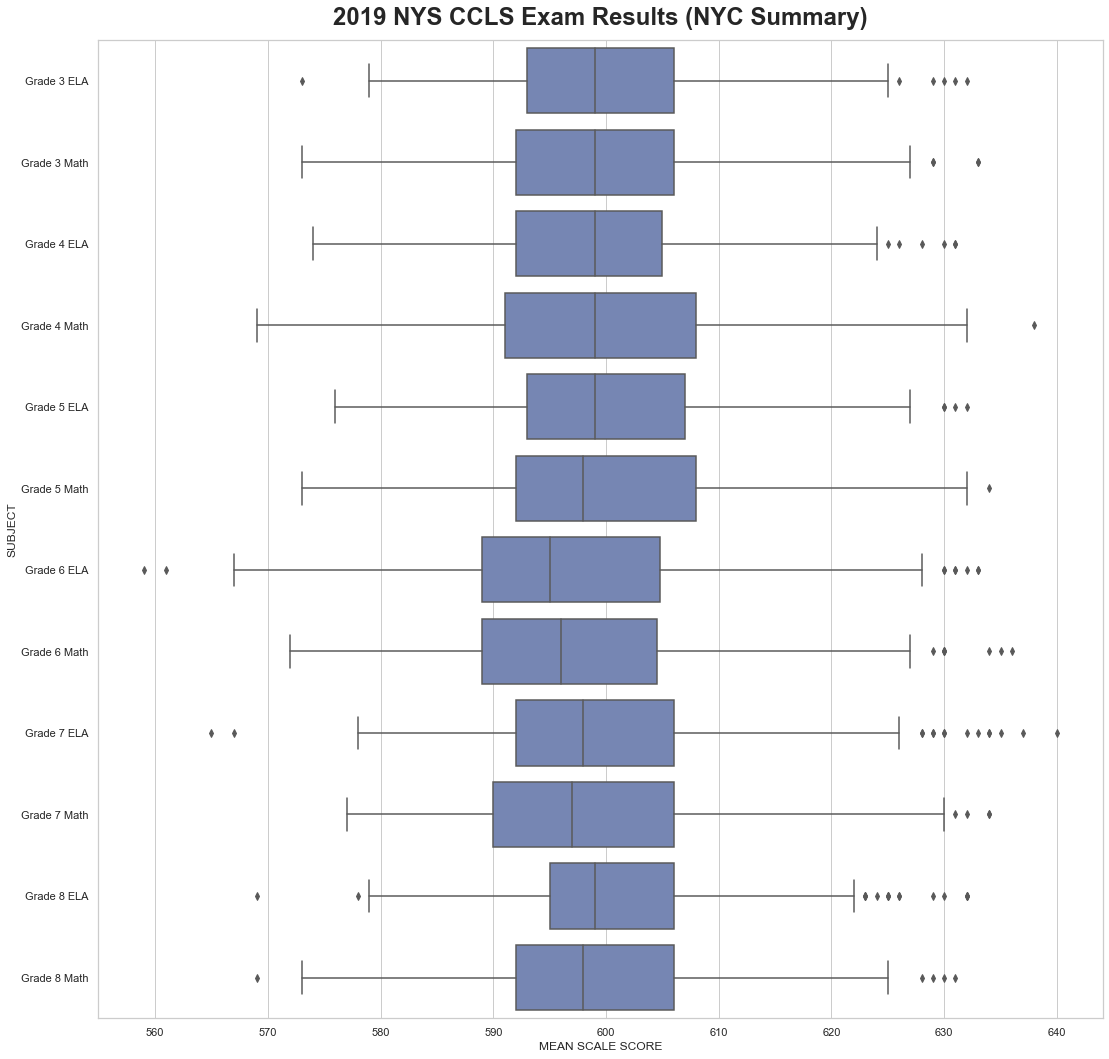

In [63]:
#create create boxplot and save to high-resolution .png file

sns.set_theme(style="whitegrid")
plt.figure(figsize=(18, 18))
sns.boxplot(x='MEAN SCALE SCORE',y='SUBJECT', color='#6c81bd',saturation=0.75,data=df).set_title("2019 NYS CCLS Exam Results (NYC Summary)", fontweight ="bold", fontsize="24", pad="15")
plt.savefig('2019_NYS_CCLS_Exam_Results_NYC_Summary.png',dpi=300)